# Câu 1: Xử lí giá trị khuyết

Yêu cầu: 
Sử dụng bộ dữ liệu thô ở chương 1 (link trong slide)
Sau đó, tiến hành xử lý theo quy trình sau:
1. dropna -> price
2. cột 21 -> replace mean 
3. cột 1 -> replace mode
4. cuối cùng, dropna cho toàn bộ dữ liệu
Quan sát giá trị thực tế, sau đó chuyển kiểu phù hợp cho các cột còn lai.

In [91]:
import numpy as np 
import pandas as pd

In [92]:
headers = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration",
    "num-of-doors", "body-style", "drive-wheels", "engine-location",
    "wheel-base", "length", "width", "height", "curb-weight", "engine-type",
    "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke",
    "compression-ratio", "horsepower", "peak-rpm", "city-mpg",
    "highway-mpg", "price"
]


In [93]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", names = headers)

## 1.Dropna Price


In [94]:
data['price'].replace("?",np.nan,inplace=True)

C:\Users\NewDat\AppData\Local\Temp\ipykernel_24116\4213882583.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['price'].replace("?",np.nan,inplace=True)


In [95]:
data1 = data.dropna(axis=0,subset=['price'])

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [97]:
data1['price']

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 201, dtype: object

## 2.Cột 21 - Replace mean

In [98]:
data1.columns[21]

'horsepower'

In [99]:
data1['horsepower'].replace("?",np.nan,inplace=True)

C:\Users\NewDat\AppData\Local\Temp\ipykernel_24116\775838234.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['horsepower'].replace("?",np.nan,inplace=True)
C:\Users\NewDat\AppData\Local\Temp\ipykernel_24116\775838234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['horsepower'].replace("?",np.nan,inplace=True)


In [100]:
data1['horsepower'] = data1['horsepower'].astype(float)

C:\Users\NewDat\AppData\Local\Temp\ipykernel_24116\1383148982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['horsepower'] = data1['horsepower'].astype(float)


In [101]:
mean = data1['horsepower'].mean()

In [102]:
data1['horsepower'] = data1['horsepower'].replace(np.nan,mean)

C:\Users\NewDat\AppData\Local\Temp\ipykernel_24116\1105248187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['horsepower'] = data1['horsepower'].replace(np.nan,mean)


In [103]:
data1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800,26,27,22470


## 3.Cột 1 - replace mode


In [104]:
data2 = data1.copy()

In [105]:
column1 = data2.columns[1]

In [106]:
missing_sym = ['?','N/A','.']

In [107]:
data2.replace(missing_sym, np.nan,inplace=True)

In [108]:
mode_column1 = data2[column1].mode()

In [109]:
data2.replace(np.nan, mode_column1.values[0], inplace=True)

In [110]:
data2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495
1,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500
2,1,161,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450


## 4. Dropna cho toàn bộ dữ liệu 

In [111]:
data2.dropna()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495
1,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500
2,1,161,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800,26,27,22470


## Chuyển kiểu

In [112]:
data2[['normalized-losses','peak-rpm','price']] = data2[['normalized-losses','peak-rpm','price']].astype(int)
data2[['bore','stroke']] = data2[['bore','stroke']].astype(float)

In [113]:
data2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495
1,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500
2,1,161,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450


In [114]:
df = data2.copy()

# Câu 2: Chuẩn hóa

Chọn các cột số chuẩn hóa theo z-score, min-max

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

In [116]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

In [117]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
ss = StandardScaler()
mm = MinMaxScaler()
for col in numeric_columns:
    df[col + '_zscore'] = ss.fit_transform(df[[col]])
for col in numeric_columns: 
    df[col + '_minmax'] = mm.fit_transform(df[[col]])

In [118]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,curb-weight_minmax,engine-size_minmax,bore_minmax,stroke_minmax,compression-ratio_minmax,horsepower_minmax,peak-rpm_minmax,city-mpg_minmax,highway-mpg_minmax,price_minmax
0,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0.411171,0.260377,0.005869,0.003838,0.1250,0.294393,0.751514,0.222222,0.289474,0.207959
1,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0.411171,0.260377,0.005869,0.003838,0.1250,0.294393,0.751514,0.222222,0.289474,0.282558
2,1,161,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,0.517843,0.343396,0.000884,0.008809,0.1250,0.495327,0.751514,0.166667,0.263158,0.282558
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,0.329325,0.181132,0.004102,0.008368,0.1875,0.252336,0.829166,0.305556,0.368421,0.219254
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,0.518231,0.283019,0.004102,0.008368,0.0625,0.313084,0.829166,0.138889,0.157895,0.306142


# Câu 3: encode các giá trị phân loại sang số 

Yêu cầu: 
- Giá trị phân loại có thứ tự thì dùng OrdinalEncode
- Không có thứ tự thì dùng integer encode, one-hot

In [119]:
nominal_columns = ['make', 'fuel-type','aspiration','body-style','drive-wheels','engine-type','fuel-system','engine-location']
ordinal_columns = ['num-of-doors', 'num-of-cylinders']

In [120]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
import pandas as pd

ohe = OneHotEncoder(sparse_output=False) 
oe = OrdinalEncoder()
le = LabelEncoder()  

for col in nominal_columns:
    encoded_data = ohe.fit_transform(df[[col]])
    
    feature_names = ohe.get_feature_names_out([col])
    
    encoded_df = pd.DataFrame(encoded_data, columns=feature_names, index=df.index)
    
    df = pd.concat([df, encoded_df], axis=1)
 
for col in ordinal_columns:
    df[col + '_ordinal_OrdEncode'] = oe.fit_transform(df[[col]])

for col in ordinal_columns:
    df[col + '_ordinal_LabelEncode'] = le.fit_transform(df[col])

In [121]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,engine-location_front,engine-location_rear,num-of-doors_ordinal_OrdEncode,num-of-cylinders_ordinal_OrdEncode,num-of-doors_ordinal_LabelEncode,num-of-cylinders_ordinal_LabelEncode
0,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,2,2
1,3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,0.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,2,2
2,1,161,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,0.0,1.0,0.0,0.0,1.0,0.0,2.0,3.0,2,3
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1,2
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1,2
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1,2
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,1,3
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,1,3


In [122]:
# One-hot encoding for 'drive-wheels'
df['drive-wheels'] = df['drive-wheels'].astype('category')
df = pd.get_dummies(df, columns=['drive-wheels'], drop_first=True)

In [123]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'engine-location', 'wheel-base', 'length',
       ...
       'fuel-system_spdi', 'fuel-system_spfi', 'engine-location_front',
       'engine-location_rear', 'num-of-doors_ordinal_OrdEncode',
       'num-of-cylinders_ordinal_OrdEncode',
       'num-of-doors_ordinal_LabelEncode',
       'num-of-cylinders_ordinal_LabelEncode', 'drive-wheels_fwd',
       'drive-wheels_rwd'],
      dtype='object', length=113)

In [124]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()
X = df[['curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore', 'drive-wheels_fwd','drive-wheels_rwd']]

Y = df['price']

m.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [125]:
Yhat = m.predict(X)

C:\Users\NewDat\AppData\Local\Temp\ipykernel_24116\4268427869.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\NewDat\AppData\Local\Temp\ipykernel_24116\4268427869.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

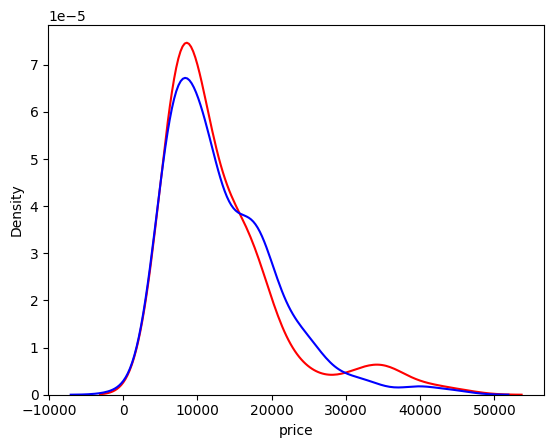

In [126]:
import seaborn as sns 

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
ax2 = sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [127]:
# Hồi quy đa thức
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2, include_bias=False)
X_poly = pr.fit_transform(df[['curb-weight', 'horsepower']])
X_poly.shape

(201, 5)

In [128]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()

m.fit(X_poly, df['price'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [145]:
import pandas as pd

# Giả định df ban đầu đã tồn tại và đã được load

# --- 1. Tạo các đặc trưng mới ---
a = df[['curb-weight']]
b = df[['horsepower']]
c = a.values * b.values
d = a ** 2
e = b ** 2

print(a)
print(b)
print(c)
print(d)
print(e)

# --- 2. Kết hợp 5 đặc trưng thành X_new ---
X_new = pd.concat([a, b, c, d, e], axis=1)

# --- 3. Đặt tên cột ---
X_new.columns = ['curb_w', 'horse_p', 'interact', 'curb_sq', 'horse_sq','extra']

# --- 4. Hiển thị ---
print("DataFrame X_new đã được tạo thành công với 5 đặc trưng mới:")
print(X_new.head())


     curb-weight
0           2548
1           2548
2           2823
3           2337
4           2824
..           ...
200         2952
201         3049
202         3012
203         3217
204         3062

[201 rows x 1 columns]
     horsepower
0         111.0
1         111.0
2         154.0
3         102.0
4         115.0
..          ...
200       114.0
201       160.0
202       134.0
203       106.0
204       114.0

[201 rows x 1 columns]
[[ 282828.        ]
 [ 282828.        ]
 [ 434742.        ]
 [ 238374.        ]
 [ 324760.        ]
 [ 275770.        ]
 [ 312840.        ]
 [ 324940.        ]
 [ 432040.        ]
 [ 241895.        ]
 [ 241895.        ]
 [ 327910.        ]
 [ 334565.        ]
 [ 369655.        ]
 [ 587860.        ]
 [ 615160.        ]
 [ 637910.        ]
 [  71424.        ]
 [ 131180.        ]
 [ 133630.        ]
 [ 127568.        ]
 [ 127568.        ]
 [ 217056.        ]
 [ 133756.        ]
 [ 135252.        ]
 [ 135252.        ]
 [ 223482.        ]
 [ 223080.      

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [ ]:
from sklearn.pipeline import 